Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [32]:
NAME = "Jingren Wang"
COLLABORATORS = "N.A."

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [33]:
import timeit
import random

eps = 1e-16 # epsilon for upper bound
N = 10000   # large input size n
locations = [0.0, 0.5, 1.0 - eps]

# function to determine the median of three numbers
def median(x1, x2, x3):
    # x2 is the median if value is between x1 and x3
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    # x3 is the median if value is between x1 and x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    # else x1 must be the median of the three
    else:
        return x1
    
# the quick sort function, return a sorted list
def qsort(lst):
    # initiate a list of (p,r) tuples 
    indices = [(0, len(lst))] #first tuple element = (p=0, r=len(lst))

    while indices:  #while indices list not empty
        (frm, to) = indices.pop() # remove last (p,r) pair from list and
                                # assign tuple values to (frm, to) 
        if frm == to: # when subarray length = 0
            continue  # move on to next while loop iteration, 
                      # pop another (p,r) if indices not yet empty

        # Find the partition:
        N = to - frm     # distance between index p and r
        inds = [frm + int(N * n) for n in locations]
            # inds store a list of indices of the first, the middle and the last element
            # in the subarray A[to,frm], total of three critical indices
        values = [lst[ind] for ind in inds]
            # retrieve element values of the three critical indices stored in inds
            # stored as a list of three elements
        partition = median(*values)
            # call the median funciton to return the median of the three elements 
            # use this partition value as pivot 
        

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        #store all elements < pivot to a 'lower' list
        upper = [a for a in lst[frm:to] if a > partition]
        #store all elements > pivot to an 'upper' list
        counts = sum([1 for a in lst[frm:to] if a == partition])
        # count the number of elements with value equal to pivot

        ind1 = frm + len(lower) # compute index of the rightmost element less than the pivot
        ind2 = ind1 + counts # compute index of the leftmost element more than the pivot 

        # Push back into correct place:
        lst[frm:ind1] = lower # rearrange all elements less than pivot to the left side of subarray, before ind1
        lst[ind1:ind2] = [partition] * counts # sandwich all values equal the pivot between ind1 and ind2 
        lst[ind2:to] = upper  # push all elements more than the pivot to the rigth side of subarray, after ind2
  
        # Enqueue other locations
        indices.append((frm, ind1)) # append (first_idx, last_idx) tuple of the left-to-pivot subarray to indices list
        indices.append((ind2, to))  # append (first_idx, last_idx) tuple of the right-to-pivot subarray to indices list
        
        
    return lst  # return lst in-place after while loop, now sorted.

# randomized algorithm to quicksort
def randomized_quicksort():
    lst = [i for i in range(N)] # initiate a sorted list of size N, N = 10000
    random.shuffle(lst)  # randomly shuffle the order of elements inside the list
    return qsort(lst)  # pass randomized list to qsort() to get sorted

# test if quicksort works
def test_quicksort():  
    lst = randomized_quicksort()  # get result list from randomized_quicksort()
    assert (lst == [i for i in range(N)]) #assert resultant list equal to sorted list of size N
                                # assertion error is raised if statement false


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.06999652599915862


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

<br>
1. Cormen's version uses recursion whereas the code here don't;
2. Cormen's version accepts whatever input array is, randomizes the choice of pivot to partition, swap to the end of array and call the normal partition() funcion;  here, we randomly permute the entire array from a sorted list before input into the quicksort function.
3. Cormen's version is in-place whereas this version is not: sublists of upper, lower and counts are created before pushing elements back into correct places.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [34]:
# create a function to calculate average performance time for each input list
def ave_rdmqsort_time(n_i, k):   
    '''
    input:
        n_i = length of ith input length stored in Ns, 
        k = number of times of timing algorithm
    output: average time of randomized_sqort at legnth n_i
    '''
    sum_time = 0
    for i in range(k):
        global N # overwrite arg N in randomized_quicksort()
        N = n_i
        sum_time += timeit.timeit(randomized_quicksort, number=1)
        
    return sum_time/k

# get x,y values: x = length of input list; y = ave algorithm running time
ns = []
ave_runtimes = []
k = 10
  
for i in range(1,6):  
    n_i = 10**i
    ns.append(n_i) # append list length
    ave_runtime_i = ave_rdmqsort_time(n_i, k)
    print(ave_runtime_i)
    ave_runtimes.append(ave_runtime_i) # append average runtime
    


6.332420016406105e-05
0.0007883446975029074
0.006683042802615091
0.06954028589971131
0.7702658088033786


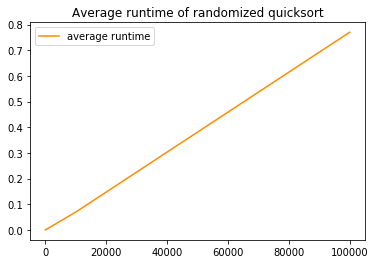

In [35]:

# plot x-y 
from matplotlib import pyplot as plt
import numpy as np

plt.plot(ns,ave_runtimes, color='darkorange', label='average runtime')
plt.title('Average runtime of randomized quicksort')
plt.legend()
plt.show()


## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [50]:
def qsort(lst):
    indices = [(0, len(lst))] 
    
    while indices:  
        (frm, to) = indices.pop() 
        #print('frm=',frm, '  to=', to)
        if frm == to: 
            continue 
                     
        # Find the partition:
        N = to - frm     
        inds = [frm + int(N * n) for n in locations] 
        values = [lst[ind] for ind in inds]
        partition = median(*values)
        
        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        
        ind1 = frm + len(lower) # compute index of the rightmost element less than the pivot
        ind2 = to - len(upper)  # compute index of the leftmost element more than the pivot 

        # Push back into correct place:
        lst[frm:ind1] = lower # rearrange all elements less than pivot to the left side of subarray, before ind1
        lst[ind2:to] = upper  # push all elements more than the pivot to the rigth side of subarray, after ind2
        for i in range(ind1, ind2):
            lst[i] = partition  # put in elements that are equal to partitions
        
        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))  
    return lst  


In [52]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

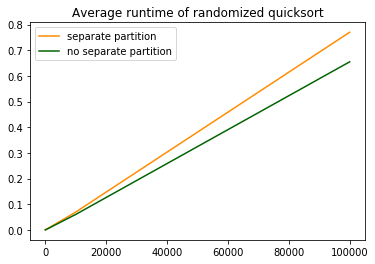

In [56]:
# collect runtime data for revised qsort()
ave_runtimes_2 = []
k = 10
  
for i in range(1,6):  
    n_i = 10**i
    ave_runtime_i = ave_rdmqsort_time(n_i, k)
    #print(ave_runtime_i)
    ave_runtimes_2.append(ave_runtime_i) # append average runtime
    
plt.plot(ns,ave_runtimes, color='darkorange', label='separate partition')
plt.plot(ns,ave_runtimes_2, color='darkgreen', label='no separate partition')
plt.title('Average runtime of randomized quicksort')
plt.legend()
plt.show()


## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [59]:
def qsort(lst):
    indices = [(0, len(lst))] 

    while indices:  
        (frm, to) = indices.pop() 
                              
        if frm == to: 
            continue   
                     
        # just use last element as pivot
        partition = lst[to-1]

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        #store all elements < pivot to a 'lower' list
        upper = [a for a in lst[frm:to] if a > partition]
        #store all elements > pivot to an 'upper' list
        counts = sum([1 for a in lst[frm:to] if a == partition])
        # count the number of elements with value equal to pivot
    
        # find critical indices
        ind1 = frm + len(lower) 
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower # rearrange all elements less than pivot to the left side of subarray, before ind1
        lst[ind1:ind2] = [partition] * counts # sandwich all values equal the pivot between ind1 and ind2 
        lst[ind2:to] = upper  # push all elements more than the pivot to the rigth side of subarray, after ind2
  
        # Enqueue other locations
        indices.append((frm, ind1)) # append (first_idx, last_idx) tuple of the left-to-pivot subarray to indices list
        indices.append((ind2, to))  # append (first_idx, last_idx) tuple of the right-to-pivot subarray to indices list
        
        
    return lst  


In [60]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



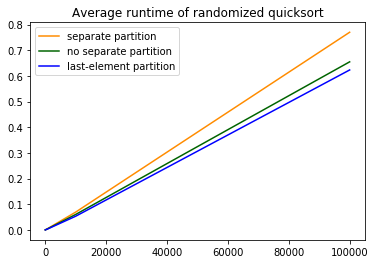

In [62]:
# collect runtime data for qsort() with simple pivot as last element
ave_runtimes_3 = []
k = 10
  
for i in range(1,6):  
    n_i = 10**i
    ave_runtime_i = ave_rdmqsort_time(n_i, k)
    #print(ave_runtime_i)
    ave_runtimes_3.append(ave_runtime_i) # append average runtime
    
plt.plot(ns,ave_runtimes, color='darkorange', label='separate partition')
plt.plot(ns,ave_runtimes_2, color='darkgreen', label='no separate partition')
plt.plot(ns,ave_runtimes_3, color='blue', label='last-element partition')

plt.title('Average runtime of randomized quicksort')
plt.legend()
plt.show()

**observation**: simple partition by last element of subarray outperform both types of parition by median-of-three.

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


assumptions:
1. first pivot is last element of input array;
2. each recursive call splits a current subarray into two subarrays;
3. depending on the nature of input array, the split at each level is dynamic, a mixture of balanced and unbalanced splits;

We could estimate the maximum size of the list through method of bisection: 
- in the worst-case (extremely unbalanced) scenario, for an input array of length n, there are total of n-1 recursive calls before breaking array down into elements of 1. due to Python limitation, n-1 <= 500, thus n_max = 501, this denotes the lower bound of n_max;
- in the best-case (extremely balanced) scenario, for an input array of length n, there are total of lgn times of recursions, we know that lgn <= 500, --> n_max = 2^500, this denotes the upper bound of n_max; 
- in the average case, as long as the split is somewhat balanced, the overall recursive depth would be $log_a(n)$~$c\theta(lgn)$ for some constant c, --> n_max = 2^(500/c)